## AST1420 ``Galactic Structure and Dynamics'' Problem Set 3  
#### Due on Nov. 19 at the start of class

#### Problem 1: Gravitational collapse in one dimension.

``[One] grows stale if he works all the time on insoluble problems, and a trip to the beautiful world of one dimension will refresh his imagination better than a dose of LSD.''



![both](https://media4.giphy.com/media/3o85xIO33l7RlmLR4I/giphy.gif?cid=ecf05e470d79a80e042369d7432c0e148a72cd214592fbf0&rid=giphy.gif)

Gravitational $N$-body simulations of structure formation in the Universe are complex and computationally demanding. 

Fortunately, some of the physics of gravitational collapse can be understood by simulating one-dimensional systems, where it is easy to reach high resolution and where gravity is simpler. Let's explore the formation of dark matter halos using gravitational $N$-body simulations in one
dimension.

(a) The Poisson equation is as usual

\begin{equation}
  \nabla^2 \Phi = 4\pi G \rho\,.
\end{equation}

An important aspect of understanding gravitation is the determination of the Green's function, that is, the solution of this equation
for a density $\rho(x) \propto \delta(x)$. 

In three dimensions, we showed in the notes that the gravitational potential for $\rho(\vec{x}) = M\,\delta(\vec{x})$ is the familiar $\Phi = -GM/r$ with $r = |\vec{x}|$. 

- Show that the solution for $\rho(x) = A\,\delta(x)$ in one dimension is given by $\Phi(x) = 2\pi G\,A\,|x|$. 
- What are the units of $A$?

\begin{equation}
  \nabla^2 (2\pi G\,A\,|x|) = \Big(\frac{\partial^2 }{\partial x^2} + \frac{\partial^2 }{\partial y^2}\Big) (2\pi G\,A\,|x|)
\end{equation}

Since we're only considering one dimension

\begin{equation}
  \frac{\partial^2 }{\partial x^2} (2\pi G\,A\,|x|)
\end{equation}

\begin{equation}
  \frac{\partial }{\partial x} (2\pi G\,A\,\frac{x}{|x|})
\end{equation}

The derivative of $\frac{x}{|x|}$ is $2\delta(x)$. The 2 because you're jumping from -1 to 1.  

\begin{equation}
  2\pi G\,A\ 2 \delta(x)
\end{equation}

Setting this equal to the right hand side and solving for $\rho (x)$: 

\begin{equation}
  4\pi G\,A\ \delta(x) = \Big(\frac{\partial^2 }{\partial x^2} + \frac{\partial^2 }{\partial y^2}\Big) (2\pi G\,A\,|x|)
\end{equation}

\begin{equation}
  4\pi G\,A\ \delta(x) =  4\pi G \rho
\end{equation}

\begin{equation}
 \rho = \,A\ \delta(x) 
\end{equation}


If x is in units of meters then $\delta(x)$ is in units of $\frac{1}{m}$. This is a property of dirac delta functions where $\delta(\alpha x) = \frac{1}{|\alpha|}\delta(x)$. So by dimensional analysis


\begin{equation}
 \big[\frac{kg}{m^3}\big] = \,A\ \big[\frac{1}{m}\big]
\end{equation}

\begin{equation}
 \,A\ = \big[\frac{kg}{m^2}\big]
\end{equation}


(b) The gravitational force corresponding to $\Phi(x) = 2\pi G\,A\,|x|$ is $F = -\mathrm{d} \Phi / \mathrm{d} x = -2\pi G\,A\,\mathrm{sign}(x)$, where $\mathrm{sign}(x)$ is the sign function that is equal to one for $x > 0$, equal to minus 1 for $x < 0$ and equal to zero for $x=0$. 

Therefore, very unlike what happens in three dimensions, the gravitational force is constant as a function of distance! 

In the next part, we will run an $N$-body simulation for $N$ equal-mass particles (so all $A$ are equal; you can also assume that $2\pi G = 1$). Because the gravitational force is constant with distance, the total force on any given particle $i$ in the sequence is therefore given by $A\times\,(N^+_i-N^-_i)$, where $N^+$ is the number of particles with $x > x_i$ and $N^-_i$ is the number of particles with $x < x_i$. 

Write a function that for a given array of positions $x_i$ computes the total force on each particle. 

Test this function by applying it to a large number of particles uniformly distributed between $-1/2$ and $1/2$, for which you should compute the analytical solution.

In [55]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()

Time taken: 0.32 s


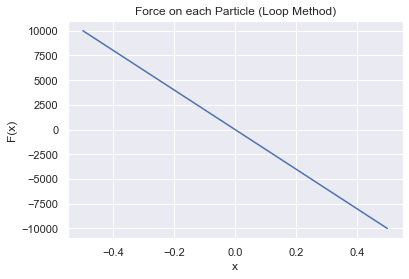

In [56]:
N = 10001
xs = np.linspace(-0.5,0.5,N)

def force_per_particle(xs):
    F = np.zeros(len(xs))

    for i,x in enumerate(xs): 

        N_plus = len(xs[xs>x])

        N_minus = len(xs[xs<x])

        F[i] = N_plus - N_minus
    
    return F 
s = time.time()
F = force_per_particle(xs)
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force on each Particle (Loop Method)");

Time taken: 2.7 s


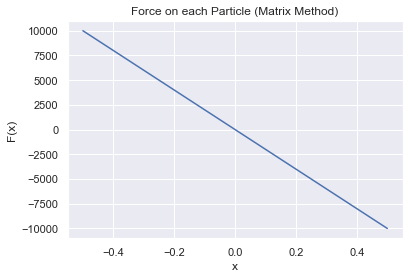

In [57]:
N = 10001
xs = np.linspace(-0.5,0.5,N)

def force_per_particle_matrix(xs):
   
    x1,x2 = np.meshgrid(xs,xs,copy=False)
    x = x1 - x2
    d = np.sign(x)
    F = - np.sum(d,axis=0)
    return F 

s = time.time()
F = force_per_particle_matrix(xs)
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force on each Particle (Matrix Method)");

Time taken: 0.013 s


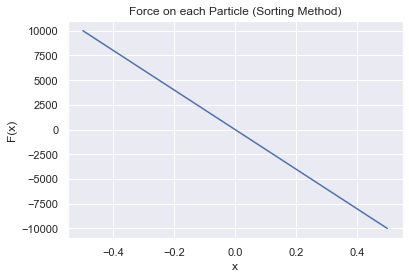

In [58]:
N = 10001
xs = np.linspace(-0.5,0.5,N)

def force_per_particle_sort(xs):
    F = np.zeros(len(xs))    
    sortedIndices = np.argsort(xs)    
    for  newIndex,originalIndex in enumerate(sortedIndices):
        
        F[originalIndex] = (len(xs) - newIndex -1) - (newIndex)
        
    return F

s=time.time()
F = force_per_particle_sort(xs)
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force on each Particle (Sorting Method)");

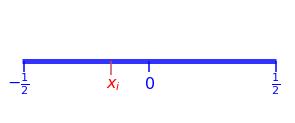

In [59]:
plt.figure(figsize=(5,2))
plt.hlines(1,xmin=0,xmax=1,lw=5,alpha=0.8,color="blue")
plt.vlines([0.005,0.5,0.99999],0.8,1,color="blue")
plt.vlines(0.35,0.75,1,color='r')
plt.text(-.06,0.5,r'$- \frac{1}{2}$',fontsize=16,color="blue")
plt.text(1-.02,0.5,r'$\frac{1}{2}$',fontsize=16,color="blue")
plt.text(0.48,0.5,r'$0$',fontsize=16,color="blue")
plt.text(0.33,0.5,r'$x_i$',fontsize=16,color="red")
plt.ylim(0,2)
plt.axis('off');

The analytic solution: 

$N_i^+ : x > x_i  = (\frac{1}{2} - x_i) \; N $


$N_i^- : x < x_i  = \big(x_i - (-\frac{1}{2} )\big) \; N $


$F(x) = A\times\,(N^+_i-N^-_i)$

$F(x) = A\times\,((\frac{1}{2} - x_i) \; N - \big(x_i - (-\frac{1}{2} )\big) \; N)$

$F(x) = A N (\frac{1}{2} - x_i  - x_i -\frac{1}{2} )$

$F(x) = A N (-2 x_i )$



Time taken: 0.00027 s


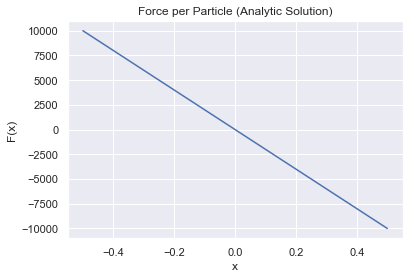

In [60]:
N = 10001
xs = np.linspace(-0.5,0.5,N)
s = time.time()
analytic_F = (- 2 * xs) * len(xs) 
print(f"Time taken: {time.time()-s:.2} s")
plt.plot(xs,analytic_F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Force per Particle (Analytic Solution)");

(c) Now write the second part of the $N$-body code by writing a leapfrog integrator that integrates all $N$ particles forward for a time step $\delta t$ using the force function that you wrote in (b). 

Use this $N$-body code to integrate the following system of initial conditions
\begin{align}
  x & \in [-\pi/2,\pi/2]\\
  v &= -0.001\,\sin(x)\\
  N & = 10,001\,,
\end{align}

where the $x$ are evenly spaced in the interval given. These initial conditions are similar to those of a dark matter halo that has just started collapsing after decoupling from the Hubble expansion. 

- Integrate this system forward for a total time of $t = 200$ with $\delta t = 0.0005$. 
- Plot the phase-space distribution $(x,v)$ at times $t=0, 18, 25, 40, 132$, and $200$. 
- Describe what you see happening.

In [ ]:
import numpy as np
import time

# This function took the shortest amount of time, altogether about 30 minutes. 
def force_per_particle_sort(xs):
    # Container
    F = np.zeros(len(xs))    
    # Get the indices that would sort an array
    sortedIndices = np.argsort(xs)    
    # Fill the container
    for newIndex,originalIndex in enumerate(sortedIndices):
        # Force =                   N+             -      N-
        F[originalIndex] = (len(xs) - newIndex -1) - (newIndex)
    return F


# This fn allows running everything at once or in segments.
def run(t_start,t_stop,xs,As,save_option):

    # Time Keeper 
    print(f"Running {t_start} to {t_stop}")

    start = time.time()
    
    # Time interval
    dt = 0.0005

    ts = np.arange(t_start/dt,t_stop/dt + dt)

    # Initial Condition
    vs = -0.001 * np.sin(xs)

    # Containers 
    x_ = []
    v_ = []

    # Leap Frog Integrator
    for i,t in enumerate(ts):
        
        if i%1000 == 0:
            print(t/ts[-1]*100," complete")

        xs = xs + vs * dt + .5 * As * dt **2

        As_new = force_per_particle_sort(xs)

        vs = vs + .5 * (As + As_new) * dt

        As = As_new

        # Save specific time steps
        if np.isin(t*dt,save_option):

            x_.append(xs)

            v_.append(vs)

    # Save everything out to a text file so it doesn't need to take the whole run time every time. 
    np.savetxt(f"x_/x_tstart_{t_start}_tstop_{t_stop}.txt",x_)
    np.savetxt(f"v_/v_tstart_{t_start}_tstop_{t_stop}.txt",v_)

    print(f"Time {time.time() - start}")    


# Total Time
t = 200

N = 10001
xs = np.linspace(-np.pi/2,np.pi/2,N)
As = force_per_particle_sort(xs)

go = True
if go:
    assignment_list = [0,18,25,40,132,200]
    my_list = list(np.arange(10,35,.5))
    run(0,36,xs,As,my_list)

Running 0 to 36
0.0  complete
1.3888888888888888  complete
2.7777777777777777  complete
4.166666666666666  complete
5.555555555555555  complete
6.944444444444445  complete
8.333333333333332  complete
9.722222222222223  complete
11.11111111111111  complete
12.5  complete
13.88888888888889  complete
15.277777777777779  complete
16.666666666666664  complete
18.055555555555554  complete
19.444444444444446  complete
20.833333333333336  complete
22.22222222222222  complete
23.61111111111111  complete
25.0  complete
26.38888888888889  complete
27.77777777777778  complete
29.166666666666668  complete
30.555555555555557  complete
31.944444444444443  complete
33.33333333333333  complete


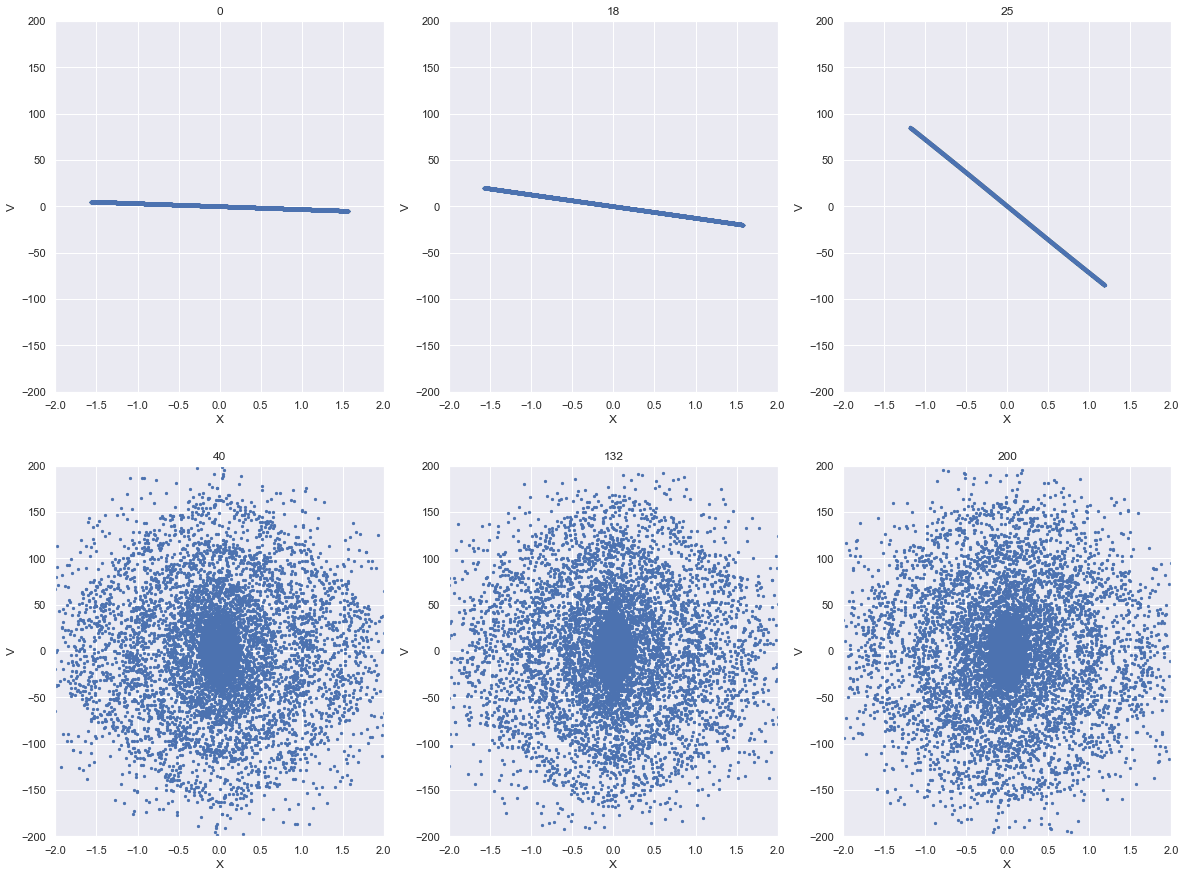

In [139]:
x = np.loadtxt('assign_x_tstart_0_tstop_200.txt')
v = np.loadtxt('assign_v_tstart_0_tstop_200.txt')

save_times = [0,18,25,40,132,200]
f, axes = plt.subplots(2,3,figsize=(20,15))

for i, ax in enumerate(axes.flatten()):

    ax.scatter(x[i],v[i],s=5)
    ax.set_title(save_times[i])
    ax.set_xlim(-2,2)
    ax.set_ylim(-200,200)
    ax.set_xlabel('X')
    ax.set_ylabel('V')

![escalated](https://media2.giphy.com/media/ToMjGpjpXMFPshSYGLm/giphy.gif)

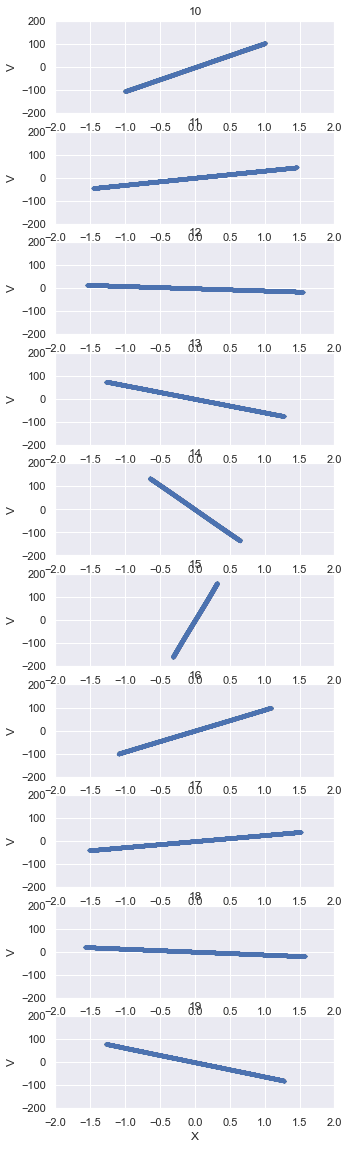

In [154]:
x = np.loadtxt('x_/x_tstart_0_tstop_31.txt')
v = np.loadtxt('v_/v_tstart_0_tstop_31.txt')

save_times = my_list
f, axes = plt.subplots(10,1,figsize=(5,20))

for i, ax in enumerate(axes):

    ax.scatter(x[i],v[i],s=5)
    ax.set_title(save_times[i])
    ax.set_xlim(-2,2)
    ax.set_ylim(-200,200)
    ax.set_xlabel('X')
    ax.set_ylabel('V')

(d) The simulation that you ran is the same as that shown in the GIF at the start of chapter 6 in the notes, but the simulation in the notes solves the $N$-body problem exactly (which is possible in 1D, because the force does not depend on distance). 

Compare your simulation's output to the GIF and discuss why your simulation might (dis)agree with the GIF.

#### Problem 2: Recycling in chemical evolution and the abundance of deuterium.


In the class notes, we ignored the effect of recycling of unprocessed material by stars back into the ISM. That is, we assumed that gas consumed by star formation was fully lost from the ISM, except for the enriched ejecta that we described using the yield parameter $p$. However, in reality, winds from massive stars return a significant amount of mass to the ISM that was not changed by the star and thus returns mass to the ISM at the star's birth abundance $Z$.

Recycling is especially important to consider if we want to investigate the abundance of deuterium in the ISM. Deuterium is an interesting element because it is only destroyed by stars without being created (to a good approximation, deuterium is only produced during Big Bang nucleosynthesis [BBN]). As such, deuterium is a good tracer of whether or not gas has ever been in a star. For example, if most of the gas in the present-day Milky Way ISM was previously processed in stars, then the deuterium abundance in the ISM should be very small, because all of the deuterium should have been destroyed. The deuterium abundance of the ISM can be determined using UV spectroscopy and it is found to be approximately $90\%$ of the primordial BBN abundance. Let's see what we can learn about chemical evolution from this basic observation!

In this problem, we will denote the mass of the ISM in deuterium as $M_D$ and the fraction of the ISM in deuterium as $X_D = M_D/M_g$. The primordial deuterium abundance is $X_D^P$ (you don't need to know the actual value, but it is $\approx 2.6\times 10^{-5}$). The observations of deuterium of the ISM show that today $X_D/X_D^P \approx 0.9$. All of the following questions can be solved analytically using the same techniques as used in the notes for the closed/leaky/accreting box models.

(a) Extend the closed box model to include the effect of recycling, which we will model as happening instantaneously. Assume that a fraction $r$ of the mass turned into stars is returned to ISM at the ISM's abundance at the time of the formation of the star. Specifically, derive the relation between $Z$, $p$, and the gas fraction as in Equation (13.7) in the presence of recycling. Discuss.

Some gas is lost to stars, some returns to winds.
\begin{equation}
\dot{M}_g=-\dot{M}_* + r\dot{M}_*=-(1-r)\dot{M}_*
\end{equation}
The metallicity is split up in gas trapped in stars and processed gas returned in supernova explosions.
\begin{equation}
\dot{M}_z = \dot{M}_{*,-} + \dot{M}_{*,+}
\end{equation}
The first term on the right is gas withheld
\begin{equation}
\dot{M}_{*,-} = Z\dot{M}_g = -Z(1-r)\dot{M}_*
\end{equation}
The second term on the right is gas enriched, where p is the yield of gas returned.
\begin{equation}
\dot{M}_{*,+} = p \dot{M}_*
\end{equation}
Plugging these two terms back in
\begin{equation}
\dot{M}_z = -Z(1-r)\dot{M}_* + p \dot{M}_* = \big( -Z(1-r) + p\big) \dot{M}_*
\end{equation}
Solving for $M_g$
\begin{equation}
\dot{M}_*=-\frac{1}{(1-r)}\dot{M}_g
\end{equation}
\begin{equation}
\dot{M}_z = \big( -Z(1-r) + p\big) \big(-\frac{1}{(1-r)}\dot{M}_g\big)
\end{equation}

\begin{equation}
\dot{M}_z = \big(Z - \frac{p}{1-r}\big) \dot{M}_g
\end{equation}
Metallicity is defined as the mass of metals divided by the mass of gass
\begin{equation}
Z=\frac{M_Z}{M_g}
\end{equation}
Taking the derivative
\begin{equation}
\dot{Z}=\frac{\dot{M_Z}}{M_g}-Z\frac{\dot{M_g}}{M_g}
\end{equation}
Plugging in our equation for $\dot{M}_z$
\begin{equation}
\dot{Z}=\big(Z - \frac{p}{1-r}\big)\frac{\dot{M_g}}{M_g}-Z\frac{\dot{M_g}}{M_g}
\end{equation}
\begin{equation}
\dot{Z}=- \frac{p}{1-r}\frac{\dot{M_g}}{M_g}
\end{equation}
The integral of which is
\begin{equation}
\boxed{Z(t)=- \frac{p}{1-r}\ln\frac{M_g(t)}{M_g(0)}}
\end{equation}

- Metallicity still increases as gas decreases, but recycling decreases the rate at which gas is trapped within stars, therefore increasing Z(t). 

- If r = 1, the result would be undefined ($\infty \times 0$) everything that is a star would be put back into the gas, therefore: no more stars, no enrichment.

- If r = 0, then you simply aren't considering winds and you get back the original expression from 13.7.

(b) Now work out the closed box model with recycling for deuterium. Remember that no deuterium is created by stars. What is the relation between $X_D/X_D^P$, $r$, and the gas fraction? For the current ISM's values of the deuterium abundance and the gas fraction, what recycling fraction do you need to match the two?

The definition of $X_D$ is given by 
\begin{equation}
X_D = \frac{M_D}{M_g}
\end{equation}
Taking the derivative using the quotient rule
\begin{equation}
\dot{X}_D = \frac{\dot{M}_D}{M_g} - X_D \frac{\dot{M}_g}{M_g}
\end{equation}
The changing rate of the mass of deuterium is governed by what deuterium is trapped in stars. No deuterium is returned through Supernovae yields but it can be returned through winds.
\begin{equation}
\dot{M}_D = -X_D\dot{M}_{*}
\end{equation}
In the above problem we found:
\begin{equation}
\dot{M}_*=-\frac{1}{(1-r)}\dot{M}_g
\end{equation}
\begin{equation}
\dot{M}_D = X_D\frac{1}{(1-r)}\dot{M}_g
\end{equation}
\begin{equation}
\dot{X}_D = (\frac{1}{(1-r)} - 1)X_D \frac{\dot{M}_g}{M_g}
\end{equation}
\begin{equation}
\dot{X}_D = \frac{r}{(1-r)}X_D \frac{\dot{M}_g}{M_g}
\end{equation}
\begin{equation}
\frac{\dot{X}_D}{X_D} = \frac{r}{(1-r)} \frac{\dot{M}_g}{M_g}
\end{equation}
Taking the integral as we did before
\begin{equation}
ln \frac{X_D(t)}{X_D(0)} = \frac{r}{(1-r)} \ln\frac{M_g(t)}{M_g(0)}
\end{equation}
$X_D(0)= X_D^P$
\begin{equation}
\frac{X_D(t)}{X_D^P} = \Big(\frac{M_g(t)}{M_g(0)}\Big)^{r/(1-r)}
\end{equation}

\begin{equation}
\boxed{X_D(t) = X_D^P  \Big(\frac{M_g(t)}{M_g(0)}\Big)^{r/(1-r)}}
\end{equation}



As recyling increases, the exponent $r/(1-r)$ increases, however since the gas fraction is always less than 1, $X_D$ will decrease as recycling increases. In the case that $r=1$, you have complete recycling, no stars are forming from the gas and thus you have $X_D(t) = X_D^P  \Big(\frac{M_g(0))}{M_g(0)}\Big)^{r/(1-r)}=X_D^P$

Solving for $r$

\begin{equation}
\frac{X_D(t_{now})}{X_D^P} =   \Big(\frac{M_g(t_{now})}{M_g(0)}\Big)^{r/(1-r)}
\end{equation}

\begin{equation}
ln \frac{X_D(t_{now})}{X_D^P} =  {r/(1-r)} ln \frac{M_g(t_{now})}{M_g(0)}
\end{equation}
\begin{equation}
r = \frac{ln \Big( \frac{X_D(t_{now})}{X_D^P}\Big)/ ln\Big(\frac{M_g(t_{now})}{M_g(0)}\Big)}{ln \Big( \frac{X_D(t_{now})}{X_D^P}\Big)/ ln\Big(\frac{M_g(t_{now})}{M_g(0)}\Big) + 1} 
\end{equation}

The problem gives us the term $\frac{X_D(t_{now})}{X_D^P}=0.9$. 

From the notes we know that the current gas fraction in the Milky Way is $\frac{M_g(t_{now})}{M_g(0)} = 0.1$

\begin{equation}
\boxed{r = \frac{\ln 0.9 / \ln 0.1}{\ln 0.9 / \ln 0.1 + 1} \approx 0.0437 }
\end{equation}

(c) Stellar evolution tells us that $r \approx 0.4$. Compare this to the value you found in (b). If they are significantly different, explain the physical reason for this in the context of the closed box model.

The value we found in b is $r\approx 0.0437$. This has an 89% percent difference from the given value of $r \approx 0.4$ which is similar to the 83% percent difference of $p$ in the notes. As an assumption, the closed boxed model neglects galactic outflows which prove to have a non-neglible effect when comparing this model to observations. 

(d) In class, we discussed how the accreting box model is successful at explaining the absence of a large number of very metal poor stars in the solar neighborhood (the G dwarf problem). Work out the evolution of the deuterium abundance $X_D/X_D^P$ in the accreting box model (with $\eta=0$), remembering that the specific model we looked at has a constant gas mass and that any inflowing gas has the primordial deuterium abundance. What recycling fraction $r$ do you need now to match $X_D/X_D^P$ given the observed gas fraction 

With the assumption that $\dot{M}_g=0$ it must also be true that $\dot{M}_{infow}=r\dot{M}_{*}$. That is, the amount of material being accreted is equal to the material that remains in stars. 

From that, we can say that the change in the mass of deuterium depends on what deuterium is being removed into stars and what deuterium is being added back into the system at the primordial abundance.  

\begin{equation}
    \dot{M}_{D} = -\dot{M}_{*} X_D + \dot{M}_{infow} X_D^P = -\dot{M}_{*} X_D + r\dot{M}_{*} X_D^P
\end{equation}

\begin{equation}
    \dot{M}_{D} =  (r X_D^P - X_D )\dot{M}_{*} 
\end{equation}

Again taking the derivative of $X_D=M_D/M_G$
\begin{equation}
\dot{X}_D = \frac{\dot{M}_D}{M_g} - X_D \frac{\dot{M}_g}{M_g}
\end{equation}

Since we've assumed $\dot{M}_g=0$


\begin{equation}
\dot{X}_D = \frac{\dot{M}_D}{M_g} = \frac{\dot{M}_{*}}{M_g} (r X_D^P - X_D )
\end{equation}

If I did our typical manuever of replacing $\dot{M}_{*}$ with an expression involving $\dot{M}_{g}$, I'd have to set that again to 0. 

Instead, inspired by the notes, I do a coordinate transform $\frac{\dot{X}_D}{\dot{M}}$ where $M$ is just $M=M_g+M_*+M_{inflow}$. The derivative of which is $\dot{M}=\dot{M_g}+\dot{M_*}+\dot{M_{inflow}}$ the first term on the right is again $0$. $\dot{M}=\dot{M_*}+r\dot{M}_{*}=(1+r)\dot{M}_{*}$

\begin{equation}
\frac{\dot{X}_D}{\dot{M}} = \frac{\dot{M}_D/M_g}{(1+r)\dot{M}_{*}} = \frac{ (r X_D^P - X_D )\dot{M}_{*} /M_g}{(1+r)\dot{M}_{*}}
\end{equation}

\begin{equation}
\frac{\dot{X}_D}{\dot{M}} = \frac{ (r X_D^P - X_D )}{(1+r)M_g}
\end{equation}

\begin{equation}
\frac{\dot{X}_D}{(r X_D^P - X_D )} = \frac{ \dot{M}}{(1+r)M_g}
\end{equation}

Taking the integral and moving the sign

\begin{equation}
\ln (X_D - r X_D^P) = - \frac{ M}{(1+r)M_g}
\end{equation}

\begin{equation}
X_D  = r X_D^P + C e^{- \frac{ M}{(1+r)M_g}}
\end{equation}

To determine the constant we'll consider intial conditions. At the start of this process, all we had was gas $ M=M_g$ and $X_D=X_D^P$

\begin{equation}
C = X_D^P(1-r) e^{\frac{ 1}{(1+r)}} 
\end{equation}

\begin{equation}
X_D  = r X_D^P + X_D^P(1-r) e^{\frac{ 1}{(1+r)}}  e^{- \frac{ M}{(1+r)M_g}}
\end{equation}

\begin{equation}
X_D  = X_D^P(r + (1-r) e^{\frac{ 1}{(1+r)}}  e^{- \frac{ M}{(1+r)M_g}})
\end{equation}

\begin{equation}
\boxed{\frac{X_D}{X_D^P}  = r + (1-r) e^{\frac{ 1}{(1+r)}(1-\frac{M}{M_g})} }
\end{equation}

Using $M/M\approx 10$ and $\frac{X_D}{X_D^P} = 0.9$ and plugging into Mathematica we get: 

![pic](Math.JPG)

Comparing to $r\approx 0.4$, in the closed box model we were a factor of 10 wrong, in the accreting model where we assume the amount accreted is the amount consumed: we're a factor of 2 wrong.

(e) Write the relation that you found in (d) in terms of the metallicity $Z$ of the ISM rather than the total-to-gas ratio $M/M_g$. Note that for this you will need to adjust the notes' accreting box model to take into account recycling (again use the $\eta=0$ version to keep things simpler). Try to obtain a very simple relation using the fact that $Z_\odot/p \ll 1$. 

Fun fact: the relation that you derive actually holds very generally, so there is a direct relation between the metallicity of the ISM and the ratio $X_D/X_D^P$, regardless of the details of inflow and outflow and the star formation history.

\begin{equation}
\dot{X}_D=\frac{\dot{M}_D}{\dot{M}_g} \;\;\;\; \dot{Z}=\frac{\dot{M}_Z}{\dot{M}_g}
\end{equation}

\begin{equation}
\frac{\dot{X}_D}{\dot{Z}} = \frac{\dot{M}_D}{\dot{M}_Z}
\end{equation}

I derived an expression for $\dot{M}_D$ in the last problem, $\dot{M}_Z$ is the amount going into stars, the amount returned at the original metallicity, and the amount returned that is enriched.

\begin{equation}
\dot{M}_Z=-Z\dot{M}_*+rZ\dot{M}_*+p\dot{M}_* = (rZ-Z+p)\dot{M}_*
\end{equation}

Plugging this in

\begin{equation}
\frac{\dot{X}_D}{\dot{Z}} = \frac{-\dot{M}_{*} X_D + r\dot{M}_{*} X_D^P}{(rZ-Z+p)\dot{M}_*}
\end{equation}

Reducing and rearranging

\begin{equation}
\frac{\dot{X}_D}{-X_D + r X_D^P} = \frac{\dot{Z}}{(rZ-Z+p)}
\end{equation}

\begin{equation}
-\ln(r X_D^P-X_D)=\frac{1}{r-1}\ln \Big((r-1)Z+p\Big)
\end{equation}

\begin{equation}
\ln(r X_D^P-X_D)=\frac{1}{1-r}\ln \Big((r-1)Z+p\Big)
\end{equation}

\begin{equation}
r X_D^P-X_D=C\Big((r-1)Z+p\Big)^{\frac{1}{1-r}}
\end{equation}

To find the integration constant $C$, $X=X_D^P$ and $Z=0$

\begin{equation}
r X_D^P-X_D^P=Cp^{\frac{1}{1-r}}
\end{equation}

\begin{equation}
X_D^P(r-1)=C p^{\frac{1}{1-r}}
\end{equation}
\begin{equation}
C = p^{\frac{1}{r-1}} X_D^P(r-1)
\end{equation}

Plugging $C$ back in

\begin{equation}
r X_D^P-X_D=p^{\frac{1}{r-1}} X_D^P(r-1)\Big((r-1)Z+p\Big)^{\frac{1}{1-r}}
\end{equation}

\begin{equation}
X_D=r X_D^P-p^{\frac{1}{r-1}} X_D^P(r-1)\Big((r-1)Z+p\Big)^{\frac{1}{1-r}}
\end{equation}

\begin{equation}
\frac{X_D}{X_D^P}=r-p^{\frac{1}{r-1}} (r-1)\Big((r-1)Z+p\Big)^{\frac{1}{1-r}}
\end{equation}

Pulling a $p$ out from the parentheses

\begin{equation}
\frac{X_D}{X_D^P}=r-p^{\frac{1}{r-1}} (r-1)\Big((r-1)\frac{Z}{p}+1\Big)^{\frac{1}{1-r}} p^{\frac{1}{1-r}}
\end{equation}

\begin{equation}
\frac{X_D}{X_D^P}=r- (r-1)\Big((r-1)\frac{Z}{p}+1\Big)^{\frac{1}{1-r}} 
\end{equation}

For small $Z/p$ we can use the taylor expansion $(1+x)^n=1+nx$

\begin{equation}
\frac{X_D}{X_D^P}=r- (r-1)(1+\frac{1}{1-r}(r-1)\frac{Z}{p})
\end{equation}

\begin{equation}
\frac{X_D}{X_D^P}=r- (r-1)(1-\frac{1}{r-1}(r-1)\frac{Z}{p})
\end{equation}

\begin{equation}
\frac{X_D}{X_D^P}=r- (r-1)(1-\frac{Z}{p})
\end{equation}

\begin{equation}
\frac{X_D}{X_D^P}=\frac{Z}{p}(r-1) -1
\end{equation}

One take-away from this problem should be that most of the hydrogen in
the disk of the Milky Way has never been inside of a
star. While all of the heavy elements in your body were produced in
stars, the hydrogen atoms that make up the $70\%$ or so of water in
your body were actually created in the Big Bang!

![wow](https://media.giphy.com/media/3o85xmYPgg7QFaJFEk/giphy.gif)